# NUS Selection-Test2 : Machine Learning in Blockchain Systems

“A blockchain is a time-stamped series of immutable record of data that is managed by a
cluster of computers not owned by any single entity. Each of these blocks of data (i.e. block)
are secured and bound to each other using cryptographic principles (i.e. chain)”.

Architecture​ : These are the core blockchain architecture components:
1. Node — user or computer within the blockchain
2. Transaction — smallest building block of a blockchain system
3. Block — a data structure used for keeping a set of transactions which is distributed to
all nodes in the network
4. Chain — a sequence of blocks in a specific order
5. Miners — specific nodes which perform the block verification process
6. Consensus— a set of rules and arrangements to carry out blockchain operations
Blockchain possesses a lot of benefits for businesses. Here are several embedded
characteristics: cryptography, immutability, provenance, decentralization, anonymity,
transparency. A layered approach of understanding may be easier for the task.

Steps in a blockchain application: ​ The actors such as users and IoT devices interact with
a typical blockchain application, which in turn interacts with a blockchain network. Before this
flow starts, the blockchain network and governance, including peers, membership services,
and endorsement policies, have already been designed, implemented, deployed and in
operation

Select one or more components in the architecture of the blockchain system where
you can apply any machine (deep) learning technique(s). ​ The task is to use
machine learning to enhance/break the fundamental blockchain system.

## Importing Libraries

In [0]:

import numpy as np
import pandas as pd
import networkx as nx
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [0]:
col_names = ['Source','Target','Rating','Timestamp']

## Reading Data

In [0]:
df = pd.read_csv('soc-sign-bitcoinotc.csv',names = col_names)

In [0]:
df.head()

,Source,Target,Rating,Timestamp
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


## Exploratory Data Analysis

In [0]:
src = df['Source']
rtn = df['Rating']

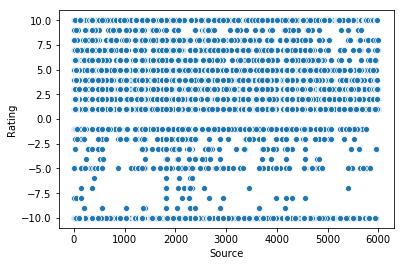

In [0]:
sns.scatterplot(x = src,y= rtn)

It can be seen from the above plot that most of the source nodes have given positive rating and it very concentrated. This gives the intuition of creating two features fairness and goodness which will be discussed below.

## Feature Engineering

In [0]:
def initialize_scores(G):
    fairness = {}
    goodness = {}
    
    nodes = G.nodes()
    for node in nodes:
        fairness[node] = 1
        try:
            goodness[node] = G.in_degree(node, weight='weight')*1.0/G.in_degree(node)
        except:
            goodness[node] = 0
    return fairness, goodness

In [0]:
def compute_fairness_goodness(G):
    fairness, goodness = initialize_scores(G)
    
    nodes = G.nodes()
    iter = 0
    while iter < 100:
        df = 0
        dg = 0

        print("Iteration number", iter)
        
        print('Updating goodness')
        for node in nodes:
            inedges = G.in_edges(node, data='weight')
            g = 0
            for edge in inedges:
                g += fairness[edge[0]]*edge[2]

            try:
                dg += abs(g/len(inedges) - goodness[node])
                goodness[node] = g/len(inedges)
            except:
                pass

        print('Updating fairness')
        for node in nodes:
            outedges = G.out_edges(node, data='weight')
            f = 0
            for edge in outedges:
                f += 1.0 - abs(edge[2] - goodness[edge[1]])/2.0
            try:
                df += abs(f/len(outedges) - fairness[node])
                fairness[node] = f/len(outedges)
            except:
                pass
        
        print('Differences in fairness score and goodness score = %.2f, %.2f' % (df, dg))
        if df < math.pow(10, -6) and dg < math.pow(10, -6):
            break
        iter+=1
    
    return fairness, goodness

In [0]:
G = nx.DiGraph()

In [0]:
f = open("soc-sign-bitcoinotc.csv","r")
for l in f:
    ls = l.strip().split(",")
    G.add_edge(ls[0], ls[1], weight = int(ls[2])/10) ## the weight should already be in the range of -1 to 1
f.close()

In [0]:
# these two dictionaries have the required scores
fairness, goodness = compute_fairness_goodness(G)

Iteration number 0
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 382.21, 0.00
Iteration number 1
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 34.47, 102.29
Iteration number 2
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 2.39, 6.97
Iteration number 3
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.39, 1.06
Iteration number 4
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.10, 0.24
Iteration number 5
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.03, 0.06
Iteration number 6
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.01, 0.02
Iteration number 7
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.00, 0.00
Iteration number 8
Updating goodness
Updating fairness
Diff

## Visualisation

In [0]:
a= [i for i,j in fairness.items() ]
b = [j for i,j in fairness.items()]
print(len(a),b)

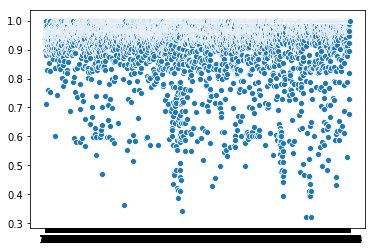

In [42]:
sns.scatterplot(x = a,y= b)

In [0]:
def my_function(row):
    return fairness[str(row)]

df['fairness'] = df['Source'].apply(my_function)

In [0]:
df.head()

,Source,Target,Rating,Timestamp,fairness
0,6,2,4,1.289242e+09,0.895726
1,6,5,2,1.289242e+09,0.895726
2,1,15,1,1.289243e+09,0.922436
3,4,3,7,1.289245e+09,0.891287
4,13,16,8,1.289254e+09,0.945563


In [0]:
def my_function2(row):
    return goodness[str(row)]

df['goodness'] = df['Target'].apply(my_function)

In [0]:
df.head()

,Source,Target,Rating,Timestamp,fairness,goodness
0,6,2,4,1.289242e+09,0.895726,0.893744
1,6,5,2,1.289242e+09,0.895726,0.940111
2,1,15,1,1.289243e+09,0.922436,0.960489
3,4,3,7,1.289245e+09,0.891287,1.000000
4,13,16,8,1.289254e+09,0.945563,1.000000


In [0]:
df.drop(['Timestamp'],axis = 1,inplace = True)

In [0]:
df.head()

,Source,Target,Rating,fairness,goodness
0,6,2,4,0.895726,0.893744
1,6,5,2,0.895726,0.940111
2,1,15,1,0.922436,0.960489
3,4,3,7,0.891287,1.000000
4,13,16,8,0.945563,1.000000


In [0]:
df['rating'] = df['Rating']
df.drop(['Rating'],axis = 1,inplace = True)

In [0]:
df.head()

,Source,Target,fairness,goodness,rating
0,6,2,0.895726,0.893744,4
1,6,5,0.895726,0.940111,2
2,1,15,0.922436,0.960489,1
3,4,3,0.891287,1.000000,7
4,13,16,0.945563,1.000000,8


# Applying Machine Learning Models

## Creating X and y 

In [0]:
X = df.iloc[:,2:4].values
y = df.iloc[:,4].values

## Splitting data into test , train and validation

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.15,random_state = 0)

## Using Logistic Regression 

In [0]:
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=250)
lg.fit(X_train,y_train)
print("Validation Accuracy is: ")
print(lg.score(X_val,y_val))
print("\n\n======================\n\n")
print("Test accuracy is: ")
lg.score(X_test,y_test)

Validation Accuracy is: 
0.5881445570736007




Test accuracy is: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5931822438658925

## Using Random Forest Classifier

In [0]:
classifier = RandomForestClassifier(n_estimators=500,criterion= 'entropy',random_state = 0)
classifier.fit(X_train,y_train)
print("Validation Accuracy is: ")
print(classifier.score(X_val,y_val))
print("\n\n======================\n\n")
print("Test accuracy is: ")
classifier.score(X_test,y_test)

Validation Accuracy is: 
0.5414279418245923




Test accuracy is: 


0.5467315976774677

## Using Gradient Boosting Algorithm

In [0]:
gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)

In [0]:
gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)
print("Validation Accuracy is: ")
print(gb.score(X_val,y_val))
print("\n\n======================\n\n")
print("Test accuracy is: ")
gb.score(X_test,y_test)

Validation Accuracy is: 
0.5967386513882768




Test accuracy is: 


0.604982206405694